# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)
                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [3]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.9
N_train = int(train_size * N_samples)
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(2, size=(N_train, N_inputs))
Y_train = np.array([1 if x[0] == 1 and x[1] == 1 else 0 for x in X_train])

X_validation = np.random.randint(2, size=(N_validation, N_inputs))
Y_validation = np.array([1 if x[0] == 1 and x[1] == 1 else 0 for x in X_validation])

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[1 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]]
Y_data (first 5 samples):
[0 0 0 0 1]


In [4]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [5]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 0.6634587191756882
Prediction: 1


In [7]:
# Obtenemos un overview de cómo funciona el modelo sin entrenar de forma aleatoria
predictions = [perceptron_and.predict(X_validation[i]) > th for i in range(N_validation)]
predictions = np.array(predictions).astype(int)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión antes de entrenar:")
print(conf_matrix)

Matriz de Confusión antes de entrenar:
[[  0 371]
 [  0 128]]


epoch: 0 | train error: 4.217092485495514 | val error: 0.0
epoch: 10 | train error: 0.046151074985546686 | val error: 0.0
epoch: 20 | train error: 0.012436989424704817 | val error: 0.0
epoch: 30 | train error: 0.005654079329313328 | val error: 0.0
epoch: 40 | train error: 0.003214738802039079 | val error: 0.0
epoch: 50 | train error: 0.0020702509937354538 | val error: 0.0
epoch: 60 | train error: 0.001443474032518501 | val error: 0.0
epoch: 70 | train error: 0.0010634954216648125 | val error: 0.0
epoch: 80 | train error: 0.000815922271637839 | val error: 0.0
epoch: 90 | train error: 0.000645697713636479 | val error: 0.0


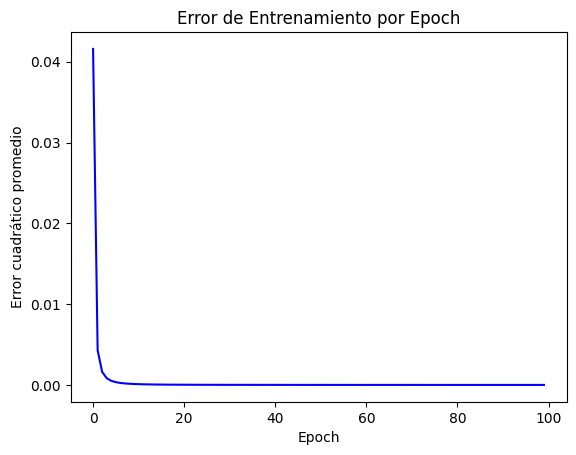

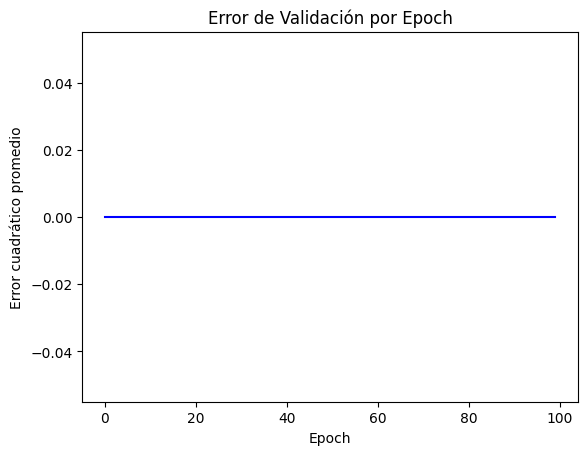

In [8]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [9]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4
th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob > th).astype('int'))

Input: [0 0]
Probabilidad: 1.2827838777091892e-09
Prediction: 0


In [10]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions = [perceptron_and.predict(X_validation[i]) > th for i in range(N_validation)]
predictions = np.array(predictions).astype(int)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión después de entrenar:")
print(conf_matrix)

Matriz de Confusión después de entrenar:
[[371   0]
 [  0 128]]


In [11]:
# Evaluamos cómo funciona el modelo en el set de test

## Generar el set de test (de forma similar al de validación)
X_test = np.random.randint(2, size=(N_validation, N_inputs))
Y_test = np.array([1 if x[0] == 1 and x[1] == 1 else 0 for x in X_test])

predictions = [perceptron_and.predict(X_test[i]) > th for i in range(N_validation)]
predictions = np.array(predictions).astype(int)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión en el set de test:")
print(conf_matrix)

Matriz de Confusión en el set de test:
[[379   0]
 [  0 120]]


## Conclusiones


En este ejercicio, hemos creado y entrenado un perceptrón para simular una puerta lógica AND. Definimos la clase Perceptron con métodos para inicialización, predicción y entrenamiento mediante descenso de gradiente. Generamos 5000 muestras aleatorias, dividiéndolas en conjuntos de entrenamiento (4500) y validación (500). Las primeras muestras muestran correctamente las etiquetas esperadas para una puerta AND.

Antes del entrenamiento, el perceptrón no logró clasificar correctamente ninguna muestra, como se refleja en la matriz de confusión inicial [[0, 371], [0, 128]]. Durante el entrenamiento, observamos una disminución significativa del error de entrenamiento de 4.217 a 0.0006, y el error de validación se mantuvo en 0.0, indicando una mejora constante.

Después del entrenamiento, la matriz de confusión mostró una clasificación perfecta en el conjunto de validación [[371, 0], [0, 128]], y una precisión similar en el conjunto de prueba [[379, 0], [0, 120]]. Esto demuestra que el perceptrón aprendió eficazmente a clasificar correctamente las entradas de la puerta AND.